<a href="https://colab.research.google.com/github/Shivamgond2022/demo/blob/main/Text_Minig(Elon_Musk).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import string
import spacy
from wordcloud import WordCloud

In [ ]:
musk = pd.read_csv("/content/Elon_musk (1).csv",error_bad_lines =False ,encoding='latin-1')
musk

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [ ]:
musk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1999 non-null   int64 
 1   Text        1999 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


#EDA

In [ ]:
#Droping unnamed column
musk.drop(columns=["Unnamed: 0"], inplace=True)

In [ ]:
musk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1999 non-null   object
dtypes: object(1)
memory usage: 15.7+ KB


In [ ]:
musk.duplicated().value_counts()

False    1997
True        2
dtype: int64

In [ ]:
musk[musk.duplicated()]

,Text
324,The most entertaining outcome is the most likely
655,@westcoastbill Indeed


In [ ]:
#We are droping duplicateded rows
musk.drop_duplicates(inplace=True)
musk.shape

(1997, 1)

#Preprocessing

In [ ]:
musk.rename(columns={"Text":"x"},inplace=True)
musk

,x
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


# Data cleaning and preprocessing

In [ ]:
count = 0
for x in musk.x:
  print(count, " : " ,x.strip()) #striping the data
  count = count+1

0  :  @kunalb11 Im an alien
1  :  @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?
2  :  @joerogan @Spotify Great interview!
3  :  @gtera27 Doge is underestimated
4  :  @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!
5  :  Happy New Year of the Ox! https://t.co/9WFKMYu2oj
6  :  Frodo was the underdoge,
All thought he would fail,
Himself most of all. https://t.co/zGxJFDzzrM
7  :  @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)
8  :  @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.
9  :  The most entertaining outcome is the most likely
10  :  @GiveDirectly Just sent some
11  :  Just agree to do Clubhouse with @kanyewest
12  :  https://t.co/3rWE9uHSTS
13  :  @geoffkeighley @UnrealEngine Its getting real
14  :  Bought some Dogecoin for lil X, so he can be a toddler hodler
15  :  @JoshManMode He definitely has issues, but the sentencing seems a bit high
16  : 

Removing extra space

In [ ]:
musk = [x.strip() for x in musk.x] # remove both the leading and the trailing character
musk = [x for x in musk if x] # remove empty strings, because they 
musk[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

Joining the list into string/text

In [ ]:
text = ' '.join(musk)
text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

Removeing Punctuation

In [ ]:
string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
no_punc_text = text.translate(str.maketrans('', '', string.punctuation))
#with arguments (x, y, z) where 'x' and 'y'
#must be equal length string and character in 'x'
#are replaced by character in 'y' 'z' 
#is a string (string.punctuation here)
no_punc_text

'kunalb11 I\x92m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It\x92s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewal

Tokenization

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:500])

['kunalb11', 'I\x92m', 'an', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'is', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo', 'was', 'the', 'underdoge', 'All', 'thought', 'he', 'would', 'fail', 'Himself', 'most', 'of', 'all', 'httpstcozGxJFDzzrM', 'OwenSparks', 'flcnhvy', 'anonyx10', 'Haha', 'thanks', 'flcnhvy', 'anonyx10', 'Indeed', 'Tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'GiveDirectly', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'kanyewest', 'httpstco3rWE9uHSTS', 'geoffkeighley', 'UnrealEngine', 'It\x9

In [ ]:
len(text_tokens)

21068

Removing Stopwords

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
my_stop_words = stopwords.words('english')
for i in my_stop_words:
  print(i, end=", ")

i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, must

In [ ]:
no_stop_tokens = []
for word in text_tokens:
  if word not in my_stop_words:
    no_stop_tokens.append(word)


In [ ]:
print(no_stop_tokens[0:40])

['kunalb11', 'I\x92m', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail']


In [ ]:
len(no_stop_tokens)

15745

In [ ]:
#Normalizing the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:200])

['kunalb11', 'i\x92m', 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'httpstcozgxjfdzzrm', 'owensparks', 'flcnhvy', 'anonyx10', 'haha', 'thanks', 'flcnhvy', 'anonyx10', 'indeed', 'tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'the', 'entertaining', 'outcome', 'likely', 'givedirectly', 'just', 'sent', 'just', 'agree', 'clubhouse', 'kanyewest', 'httpstco3rwe9uhsts', 'geoffkeighley', 'unrealengine', 'it\x92s', 'getting', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'joshmanmode', 'he', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'freewalletorg', 'thanks', 'fixing', 'freewallet

In [ ]:
len(lower_words)

15745

Stemming

In [ ]:
from nltk.stem import PorterStemmer #stoping the words
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['kunalb11', 'i\x92m', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'joerogan', 'spotifi', 'great', 'interview', 'gtera27', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'now', 'next', 'even', 'happi', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdog', 'all', 'thought', 'would', 'fail']


Lemmatizer[it gives dictionary meaning]

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lemmatizer_tokens = [lemmatizer.lemmatize(word) for word in lower_words]
print(lemmatizer_tokens[0:40])

['kunalb11', 'i\x92m', 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimated', 'teslacn', 'congratulation', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail']


#Feature Extraction by using CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=100)
X= vectorizer.fit_transform(lemmatizer_tokens)

In [ ]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=False).head(20)

,0
you,99
yes,98
year,97
yeah,96
would,95
work,94
will,93
wholemarsblog,92
well,91
week,90


In [ ]:
print(vectorizer.vocabulary_)

{'idaacarmack': 34, 'great': 31, 'tesla': 73, 'year': 97, 'next': 51, 'even': 21, 'new': 50, 'would': 95, 'flcnhvy': 26, 'haha': 32, 'time': 84, 'the': 79, 'it': 35, 'high': 33, 'u0001f923u0001f923': 87, 'this': 83, 'true': 86, 'rt': 65, 'spacex': 69, 'nasa': 47, 'falcon': 23, 'launch': 37, 'first': 25, 'one': 54, 'mission': 44, 'ajtourville': 1, 'yes': 98, 'rationaletienne': 61, 'well': 91, 'amp': 3, 'need': 49, 'tobyliiiiiiiiii': 85, 'earth': 15, 'that': 78, 'you': 99, 're': 62, 'work': 94, 'go': 29, 'erdayastronaut': 19, 'booster': 7, 'people': 55, 'lexfridman': 38, 'not': 53, 'kristennetten': 36, 'yeah': 96, 'sure': 72, 'get': 28, 'much': 46, 'teslarati': 75, 'will': 93, 'still': 71, 'nasaspaceflight': 48, 'engine': 16, 'good': 30, 'point': 56, 'actually': 0, 'we': 89, 'no': 52, 'space': 67, 'dragon': 14, 'make': 41, 'felixschlang': 24, 'marcushousegame': 42, 'crew': 12, 'lot': 40, 'ercxspace': 18, 'teslaownerssv': 74, 'day': 13, 'starship': 70, 'engineersfeed': 17, 'better': 6, 'c

In [ ]:
print(vectorizer.get_feature_names()[100:200])
print(X.toarray()[100:200])

[]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(X.toarray().shape)

(15745, 100)


CountVectorizer with N-Grams(Bigrams and Trigrams)

In [ ]:
vectorizer_ngram_range = CountVectorizer(analyzer='word', ngram_range=(1,3),max_features = 100)
bow_matrix_ngram = vectorizer_ngram_range.fit_transform(lemmatizer_tokens)

In [ ]:
bow_matrix_ngram

<15745x100 sparse matrix of type '<class 'numpy.int64'>'
	with 4416 stored elements in Compressed Sparse Row format>

In [ ]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['actually', 'ajtourville', 'also', 'amp', 'austinbarnard45', 'best', 'better', 'booster', 'car', 'cleantechnica', 'coming', 'could', 'day', 'dragon', 'earth', 'engine', 'engineersfeed', 'ercxspace', 'erdayastronaut', 'evafoxu', 'even', 'exactly', 'falcon', 'felixschlang', 'first', 'flcnhvy', 'flight', 'get', 'go', 'good', 'great', 'haha', 'high', 'idaacarmack', 'it', 'kristennetten', 'launch', 'lexfridman', 'like', 'lot', 'make', 'marcushousegame', 'maybe', 'mission', 'model', 'much', 'nasa', 'nasaspaceflight', 'need', 'new', 'next', 'no', 'not', 'one', 'people', 'point', 'ppathole', 'pretty', 'probably', 'production', 'rationaletienne', 're', 'right', 'rocket', 'rt', 'soon', 'space', 'spacestation', 'spacex', 'starship', 'still', 'sure', 'tesla', 'teslaownerssv', 'teslarati', 'tesmaniancom', 'test', 'that', 'the', 'there', 'thesheetztweetz', 'they', 'this', 'time', 'tobyliiiiiiiiii', 'true', 'u0001f923u0001f923', 'way', 'we', 'we re', 'week', 'well', 'wholemarsblog', 'will', 'work', 

TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_festures = TfidfVectorizer(norm="l2", analyzer='word', ngram_range=(1,3), max_features=100)
tf_idf_matrix_n_gram_max_features = vectorizer_n_gram_max_festures.fit_transform(lemmatizer_tokens)

In [ ]:
print(vectorizer_n_gram_max_festures.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray())

['actually', 'ajtourville', 'also', 'amp', 'austinbarnard45', 'best', 'better', 'booster', 'car', 'cleantechnica', 'coming', 'could', 'day', 'dragon', 'earth', 'engine', 'engineersfeed', 'ercxspace', 'erdayastronaut', 'evafoxu', 'even', 'exactly', 'falcon', 'felixschlang', 'first', 'flcnhvy', 'flight', 'get', 'go', 'good', 'great', 'haha', 'high', 'idaacarmack', 'it', 'kristennetten', 'launch', 'lexfridman', 'like', 'lot', 'make', 'marcushousegame', 'maybe', 'mission', 'model', 'much', 'nasa', 'nasaspaceflight', 'need', 'new', 'next', 'no', 'not', 'one', 'people', 'point', 'ppathole', 'pretty', 'probably', 'production', 'rationaletienne', 're', 'right', 'rocket', 'rt', 'soon', 'space', 'spacestation', 'spacex', 'starship', 'still', 'sure', 'tesla', 'teslaownerssv', 'teslarati', 'tesmaniancom', 'test', 'that', 'the', 'there', 'thesheetztweetz', 'they', 'this', 'time', 'tobyliiiiiiiiii', 'true', 'u0001f923u0001f923', 'way', 'we', 'we re', 'week', 'well', 'wholemarsblog', 'will', 'work', 

# Genrating WordCloud

In [ ]:
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
def plot_cloud(wordcloud):
  plt.figure(figsize=(40,30))
  plt.imshow(wordcloud)
  plt.axis("off");

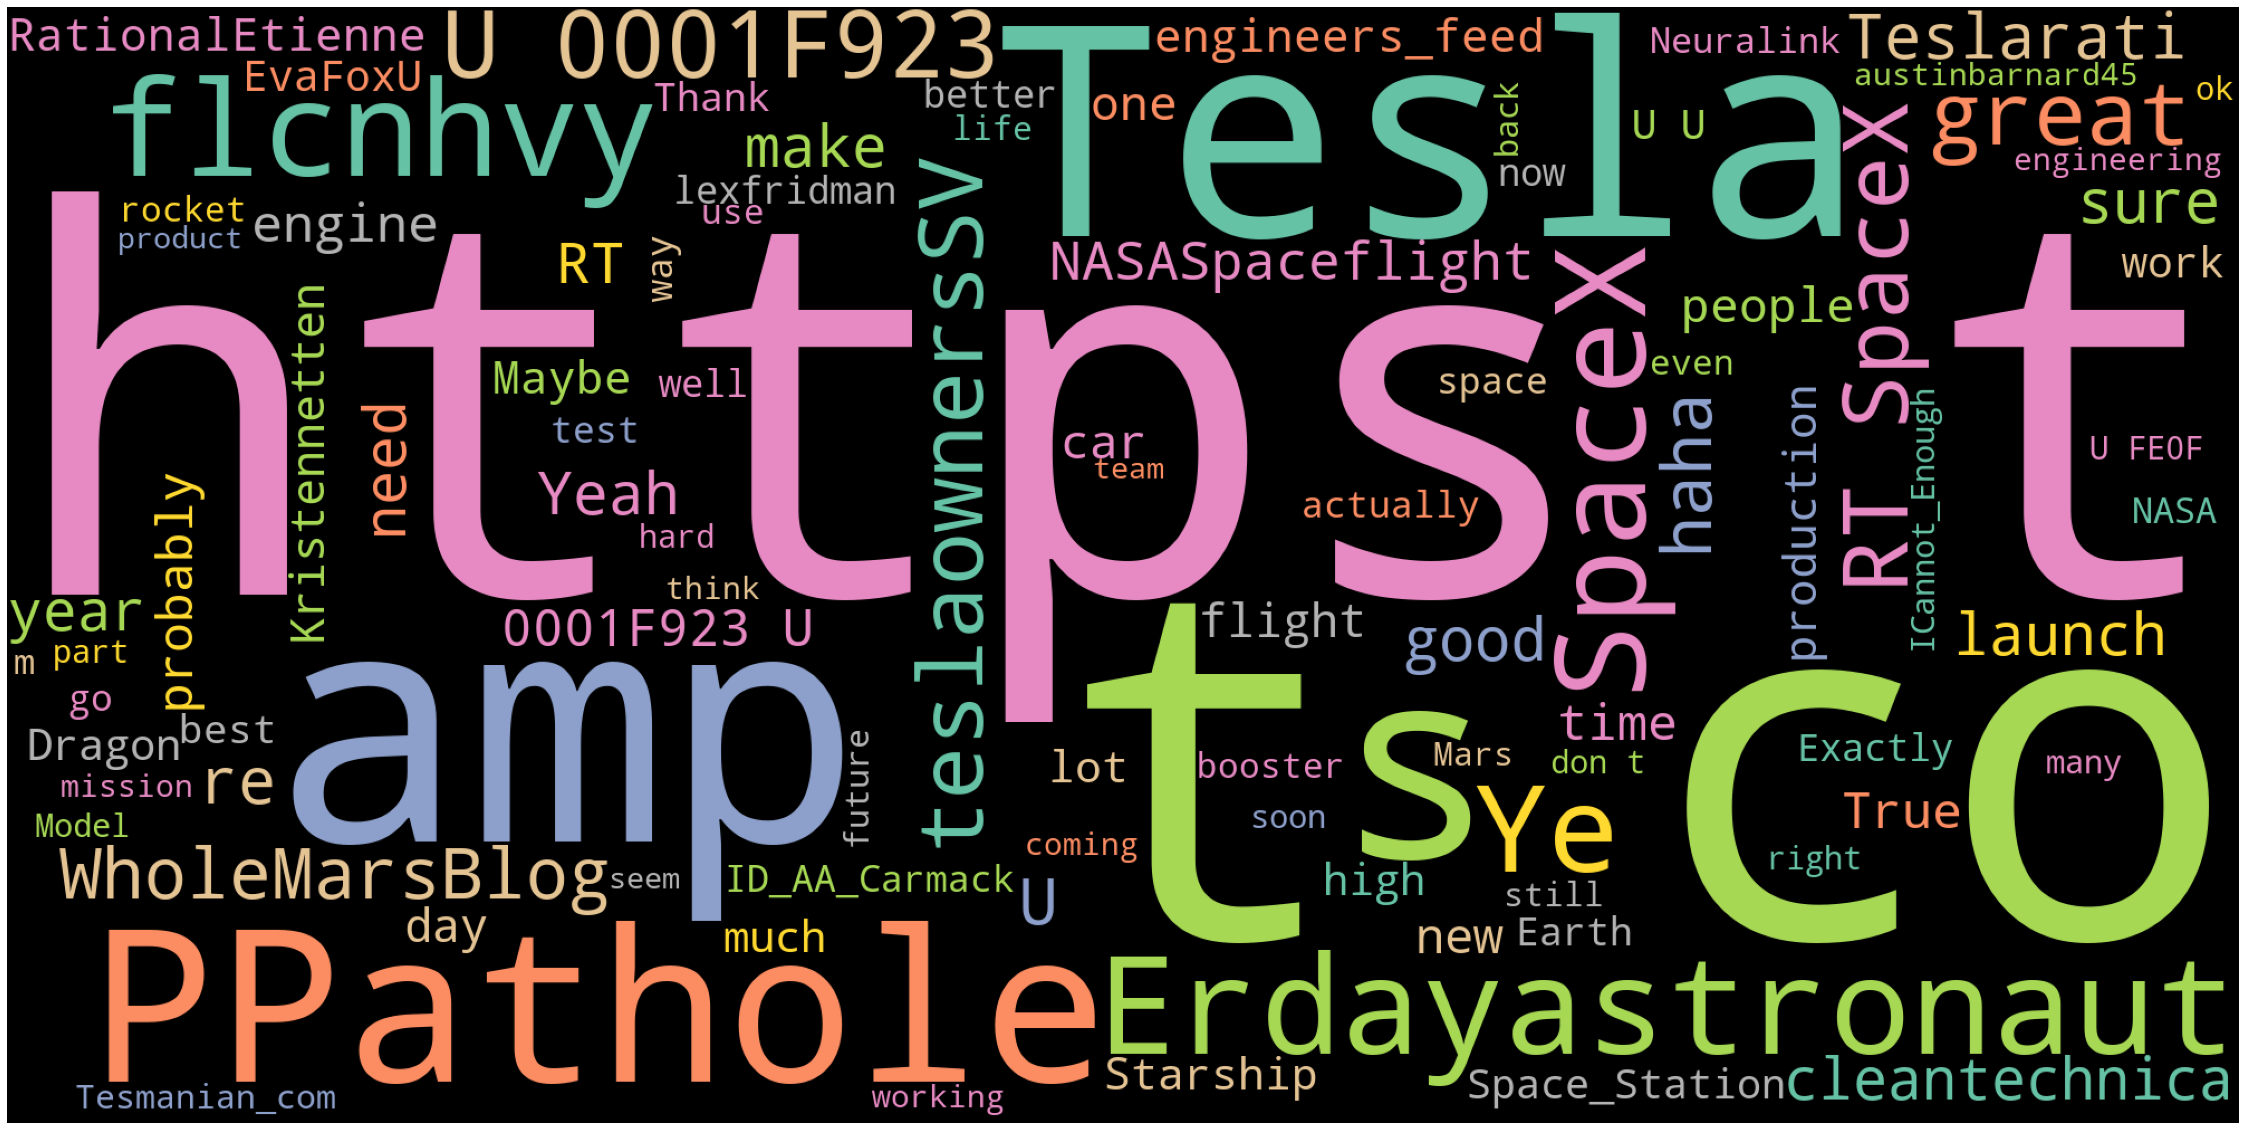

In [ ]:
#Generating wordcloud
stopwords = STOPWORDS
stopwords.add('will')
stopwords.add('apple')
stopwords.add('Amazon')
stopwords.add('laptop')
wordcloud = WordCloud(width = 2000, height = 1000, background_color='black', max_words=100, colormap='Set2', stopwords=stopwords).generate(text)
plot_cloud(wordcloud)

# Named Entity Recognition 

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
one_block = no_punc_text
doc_block = nlp(one_block)
spacy.displacy.render(doc_block,style="ent", jupyter=True)